In [1]:
import numpy as np
import pandas as pd
import tempfile
import json
import seaborn as sns
sns.set(style="darkgrid")

import warnings
warnings.simplefilter('ignore')
import logging
logging.basicConfig()
logger = logging.getLogger()
logger.setLevel(logging.INFO)

from banditpylib.arms import BernoulliArm
from banditpylib.bandits import OrdinaryBandit
from banditpylib.protocols import SinglePlayerProtocol
from banditpylib.learners.ordinary_fcbai_learner import ExpGap, LilUCBHeuristic

In [2]:
confidence = 0.95
means = [0.3, 0.5, 0.7]
arms = [BernoulliArm(mean) for mean in means]
bandit = OrdinaryBandit(arms=arms)
learners = [ExpGap(arm_num=len(arms), confidence=confidence),
            LilUCBHeuristic(arm_num=len(arms), confidence=confidence)]
# for each setup we run 200 trials
trials = 10
temp_file = tempfile.NamedTemporaryFile()

In [3]:
for learner in learners:
  # game simulation
  game = SinglePlayerProtocol(bandit=bandit, learner=learner)
  game.play(trials=trials, output_filename=temp_file.name, debug=True)

INFO:absl:exp_gap's play with ordinary_bandit runs 0.15 seconds.
INFO:absl:lilUCB_heur's play with ordinary_bandit runs 0.86 seconds.


In [4]:
with open(temp_file.name, 'r') as f:
  data = []
  lines = f.readlines()
  for line in lines:
    data.append(json.loads(line))
  data_df = pd.DataFrame.from_dict(data)

In [5]:
data_df.head()

,bandit,learner,rounds,total_actions,regret
0,ordinary_bandit,exp_gap,2,5832,0
1,ordinary_bandit,exp_gap,2,5832,0
2,ordinary_bandit,exp_gap,2,5832,0
3,ordinary_bandit,exp_gap,2,5832,0
4,ordinary_bandit,exp_gap,2,5832,0


In [6]:
data_df['confidence'] = confidence

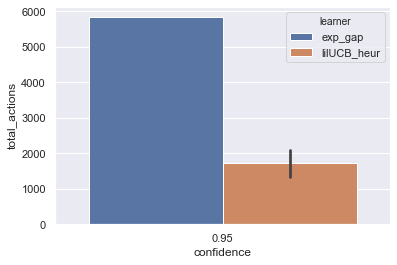

In [7]:
sns.barplot(x='confidence', y='total_actions', hue='learner', data=data_df)